# 중간고사 대체 Project

수업시간에 다룬 범위 내에서의 지도학습 머신러닝 알고리즘(분류모형)을 3가지 이상 적용해 보기. <br>
(앙상블 알고리즘은 최소한 1개 이상 포함되어야 함) <br>

1. Hyper Parameter Tuning Required
2. Each Algorithm should be compared by appropriate performance score
3. Selection or changing of features is optional
4. Noticed that prediction performance would be low due to feature of data




In [3]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from warnings import filterwarnings


filterwarnings('ignore')

## 변수설명

Yc = 5 영업일 이후 시작시점까지의 종가 수익률의 +/- 여부 <br>

In [1]:
data = pd.read_csv('./Data/RAWDATA.csv', index_col=0)

'''Index 맞처준거'''

X_train = pd.concat([data[data.columns[:-1]][0:1700], data[data.columns[:-1]][2000:3000]])
y_train = pd.concat([data['Yc'][0:1700], data['Yc'][2000:3000]])
X_test = pd.concat([data[data.columns[:-1]][1700:2000], data[data.columns[:-1]][3000:]])
y_test = pd.concat([data['Yc'][1700:2000], data['Yc'][3000:]])

'''Don't Touch!!!'''

NameError: name 'pd' is not defined

array([[<AxesSubplot:xlabel='ROC', ylabel='ROC'>,
        <AxesSubplot:xlabel='ROC5', ylabel='ROC'>,
        <AxesSubplot:xlabel='Momemtum2', ylabel='ROC'>,
        <AxesSubplot:xlabel='BBmavg', ylabel='ROC'>,
        <AxesSubplot:xlabel='BBup', ylabel='ROC'>,
        <AxesSubplot:xlabel='BBpctB', ylabel='ROC'>,
        <AxesSubplot:xlabel='DIp', ylabel='ROC'>,
        <AxesSubplot:xlabel='DIn', ylabel='ROC'>,
        <AxesSubplot:xlabel='DI', ylabel='ROC'>,
        <AxesSubplot:xlabel='ADX', ylabel='ROC'>,
        <AxesSubplot:xlabel='ema20', ylabel='ROC'>,
        <AxesSubplot:xlabel='sma20', ylabel='ROC'>,
        <AxesSubplot:xlabel='ema60', ylabel='ROC'>,
        <AxesSubplot:xlabel='sma60', ylabel='ROC'>,
        <AxesSubplot:xlabel='MACDoscil', ylabel='ROC'>,
        <AxesSubplot:xlabel='MACDsignal', ylabel='ROC'>,
        <AxesSubplot:xlabel='rsi', ylabel='ROC'>,
        <AxesSubplot:xlabel='Sfastk', ylabel='ROC'>,
        <AxesSubplot:xlabel='SfastD', ylabel='ROC'>,
        <A

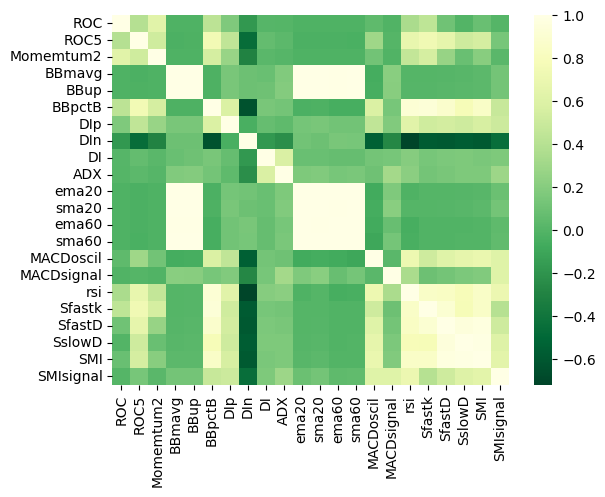

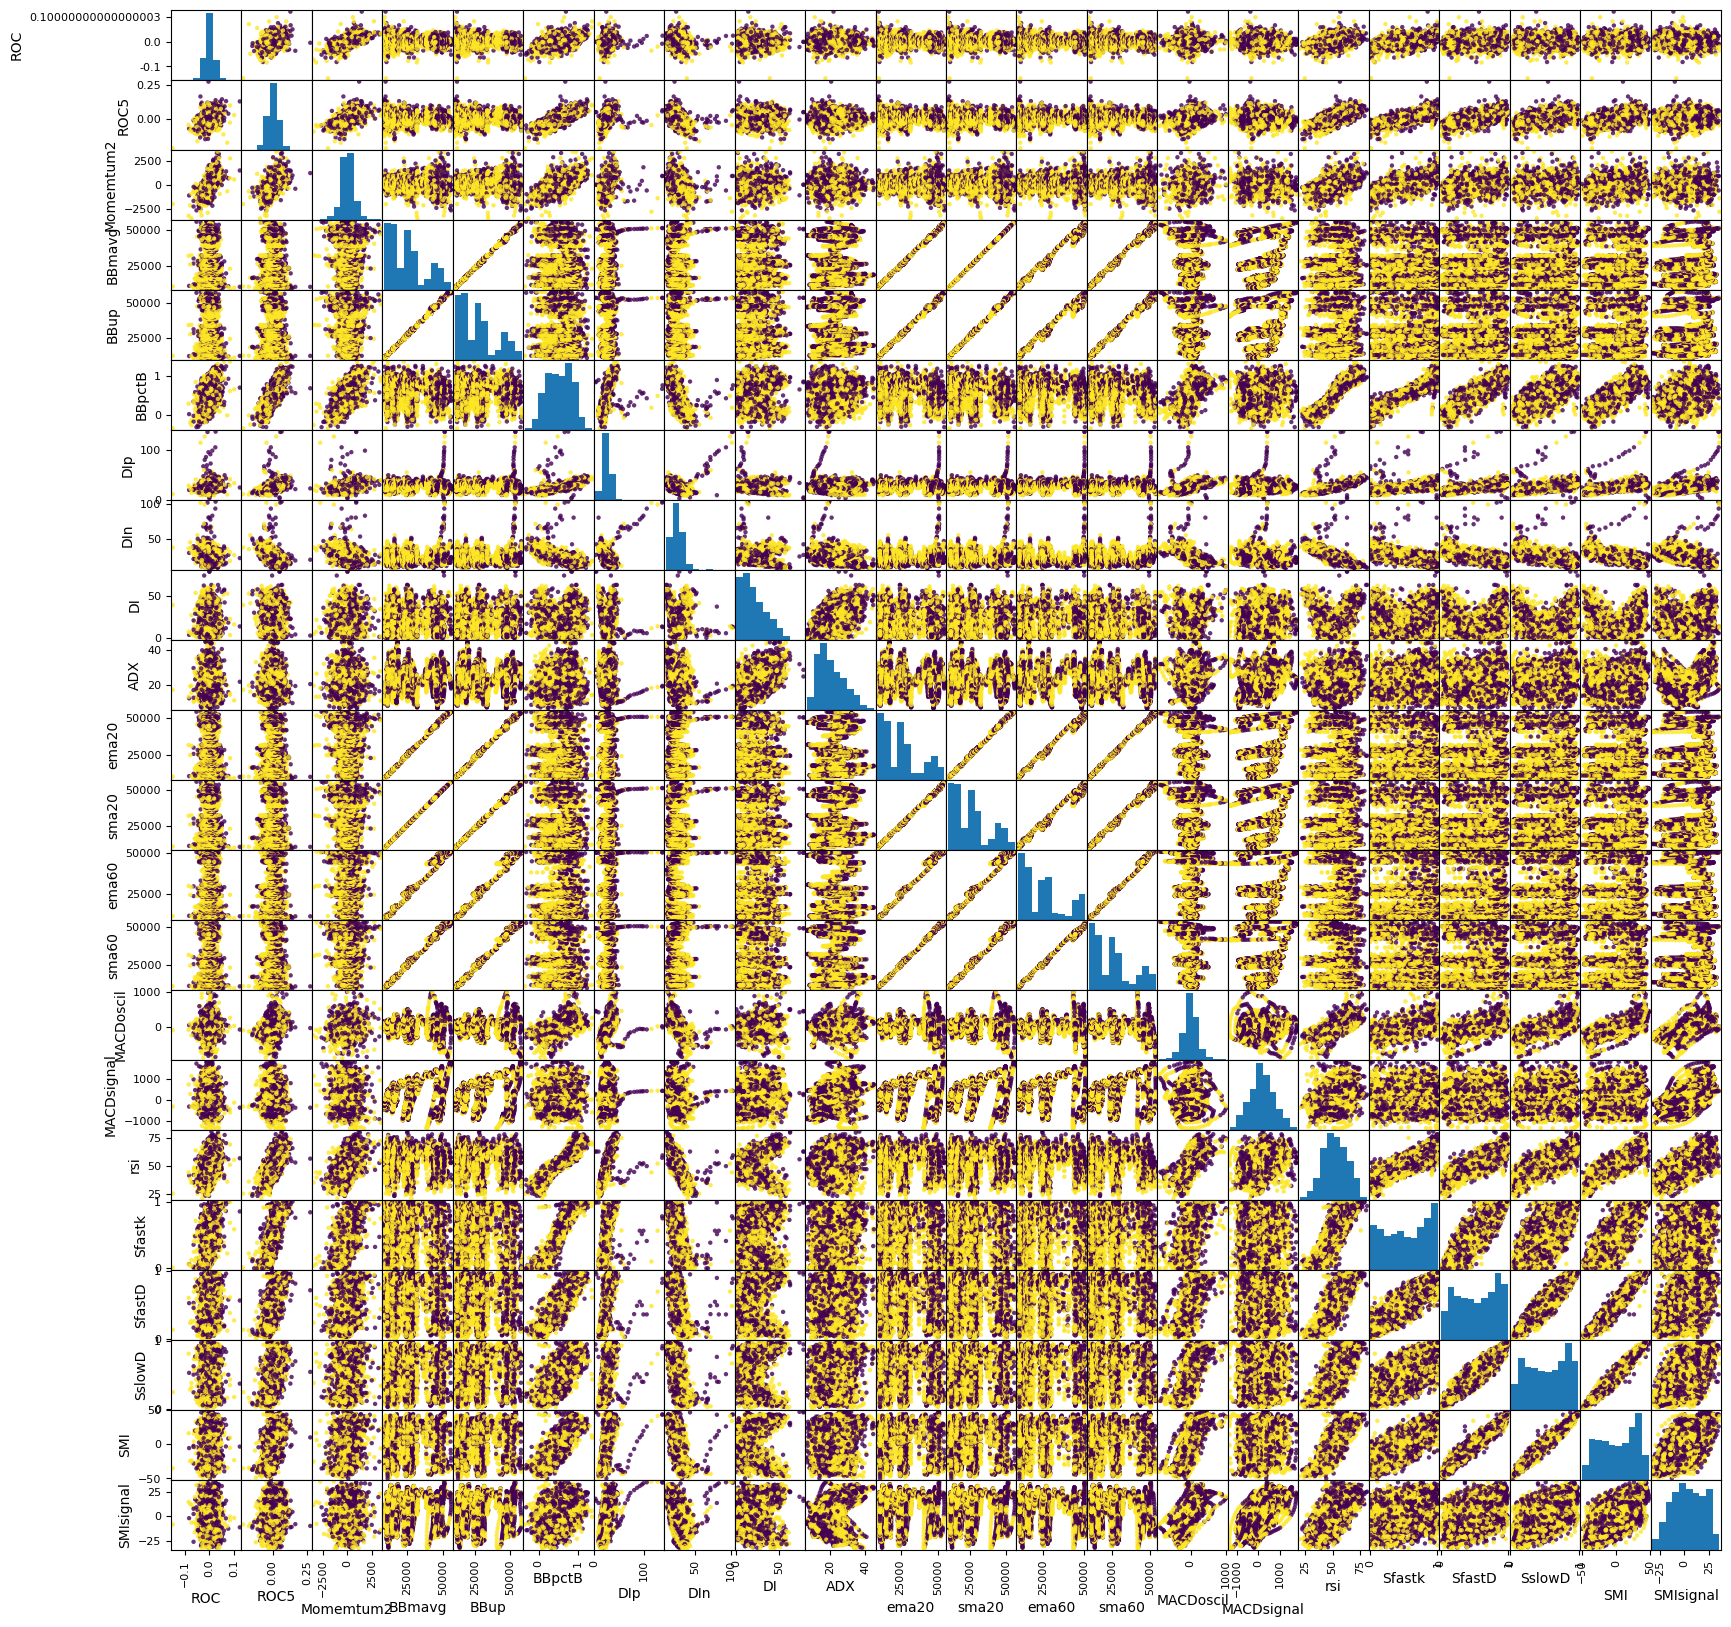

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

sns.heatmap(X_train.corr())

scatter_matrix(X_train, c=y_train, marker='o', s=10, alpha=0.8, figsize=(20,20))

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# PCA 적용 여부 고민해보기

In [7]:
'''주성분 옵션 선택'''

from sklearn.decomposition import PCA

variance_ratio = {}

for i in range(0, 23):
    if (i%2 == 0):
        print(i)

    pca = PCA(n_components=i)
    pca.fit(X_train_scaled)
    variance_ratio['_'.join(['n', str(i)])] = pca.explained_variance_ratio_.sum()



0
2
4
6
8
10
12
14
16
18
20
22


In [8]:
variance_ratio

{'n_0': 0.0,
 'n_1': 0.3602698451413472,
 'n_2': 0.6384960763379346,
 'n_3': 0.7353632894318427,
 'n_4': 0.8061198394677487,
 'n_5': 0.8578335472854682,
 'n_6': 0.8980899364647168,
 'n_7': 0.928647714293176,
 'n_8': 0.9474258212347044,
 'n_9': 0.9649994972402743,
 'n_10': 0.9799608338820465,
 'n_11': 0.9864355925168697,
 'n_12': 0.9919710738132124,
 'n_13': 0.9953973540878938,
 'n_14': 0.998020815468935,
 'n_15': 0.999170988838332,
 'n_16': 0.9996768313439088,
 'n_17': 0.9998907535838526,
 'n_18': 0.9999449655670702,
 'n_19': 0.9999890813628343,
 'n_20': 0.999998694956844,
 'n_21': 1.0,
 'n_22': 1.0}

In [9]:
variance_ratio = []
ratio = 0
for i in np.sort(pca.explained_variance_ratio_)[::-1]:
    ratio += i
    variance_ratio.append(ratio)

In [10]:
variance_ratio

[0.36026984514134663,
 0.6384960763379341,
 0.7353632894318434,
 0.8061198394677493,
 0.8578335472854675,
 0.8980899364647157,
 0.928647714293176,
 0.9474258212347053,
 0.964999497240275,
 0.9799608338820466,
 0.9864355925168691,
 0.9919710738132131,
 0.9953973540878936,
 0.9980208154689348,
 0.9991709888383323,
 0.9996768313439095,
 0.9998907535838519,
 0.9999449655670702,
 0.9999890813628343,
 0.999998694956844,
 1.0,
 1.0]

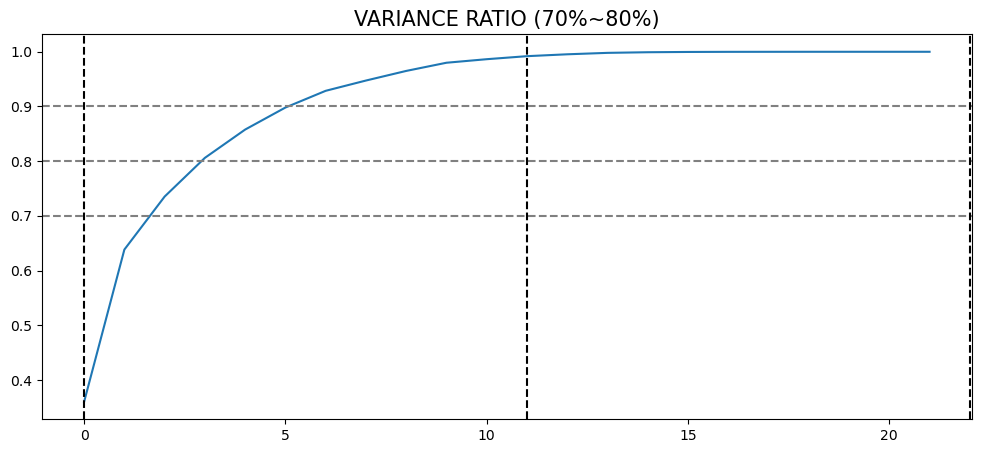

In [11]:
plt.figure(figsize=(12, 5))

plt.plot(list(range(0, 22)), variance_ratio)

plt.axhline(0.7, color='gray', ls='--')
plt.axhline(0.8, color='gray', ls='--')
plt.axhline(0.9, color='gray', ls='--')

plt.axvline(0, color='black', ls='--')
plt.axvline(11, color='black', ls='--')
plt.axvline(22, color='black', ls='--')

plt.title("VARIANCE RATIO (70%~80%)", size=15)
plt.show()


# 모델 (1) - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

logistic = LogisticRegression()

pca = PCA(n_components=8)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

logistic.fit(X_train_scaled_pca, y_train)

logistic.intercept_, logistic.coef_

y_preds = logistic.predict(X_test_scaled_pca)

mse = mean_squared_error(y_test, y_preds)
acc = accuracy_score(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

acc, 


(0.5,)

In [13]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

y_pred_raw = lr_clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_raw)

print('accuracy score :', acc, sep=' ')
pd.Series(data=lr_clf.coef_[0], index=X_train.columns)

accuracy score : 0.5295031055900621


ROC          -0.093636
ROC5         -0.060706
Momemtum2    -0.118734
BBmavg        0.227004
BBup         -0.336437
BBpctB        0.160720
DIp          -0.138686
DIn           0.073030
DI            0.098934
ADX          -0.014291
ema20         0.283577
sma20         0.227004
ema60        -0.367342
sma60        -0.112886
MACDoscil    -0.154076
MACDsignal   -0.225284
rsi           0.129156
Sfastk        0.201448
SfastD       -0.548500
SslowD        0.293925
SMI          -0.088559
SMIsignal     0.247198
dtype: float64

In [14]:
'''이때, [:,1] 벡터가 1일 확률'''
pred_lr_clf = lr_clf.predict_proba(X_test_scaled)
pred_lr_clf

array([[0.42501236, 0.57498764],
       [0.42911441, 0.57088559],
       [0.40400225, 0.59599775],
       ...,
       [0.57901031, 0.42098969],
       [0.5739943 , 0.4260057 ],
       [0.58968986, 0.41031014]])

In [15]:
'''Default Threshold = 0.5 인데, 이거 따라서 어케 변하는지 보자'''
from sklearn.metrics import accuracy_score
threshold = 0.9

y_pred_thres = np.where(pred_lr_clf[:,1] > threshold, 1, 0)

y_pred_thres.shape

accuracy_score(y_test, y_pred_thres)

confusion_matrix(y_test, y_pred_thres)

array([[298,   0],
       [346,   0]])

In [16]:
def eval_list(cm):
    Accuracy = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1, ))
    Precision = cm[1, 1] /sum(cm[:, 1])
    Recall = cm[1, 1] / sum(cm[1])
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return ([Accuracy, Precision, Recall, F1])

In [17]:
threshold = np.arange(0, 1, 0.05)
table = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])

pred_lr_clf = lr_clf.predict_proba(X_test_scaled)
for i in threshold:
    y_pred_thres = np.where(pred_lr_clf[:,1] > i, 1, 0)
    table.loc[i] = eval_list(confusion_matrix(y_test, y_pred_thres))

table.index.name = 'threshold'
table.columns.name = 'performance'

table

performance  Accuracy  Precision    Recall        F1
threshold                                           
0.00         0.537267   0.537267  1.000000  0.698990
0.05         0.537267   0.537267  1.000000  0.698990
0.10         0.537267   0.537267  1.000000  0.698990
0.15         0.537267   0.537267  1.000000  0.698990
0.20         0.537267   0.537267  1.000000  0.698990
0.25         0.537267   0.537267  1.000000  0.698990
0.30         0.540373   0.539062  0.997110  0.699797
0.35         0.535714   0.537480  0.973988  0.692703
0.40         0.532609   0.537190  0.939306  0.683491
0.45         0.532609   0.541133  0.855491  0.662934
0.50         0.529503   0.550827  0.673410  0.605982
0.55         0.501553   0.547170  0.419075  0.474632
0.60         0.448758   0.450549  0.118497  0.187643
0.65         0.461180   0.476190  0.028902  0.054496
0.70         0.462733   0.500000  0.011561  0.022599
0.75         0.464286   0.600000  0.008671  0.017094
0.80         0.465839   1.000000  0.005780  0.011494
0.85         0.464286   1.000000  0.002890  0.005764
0.90         0.462733        NaN  0.000000       NaN
0.95         0.462733        NaN  0.000000       NaN

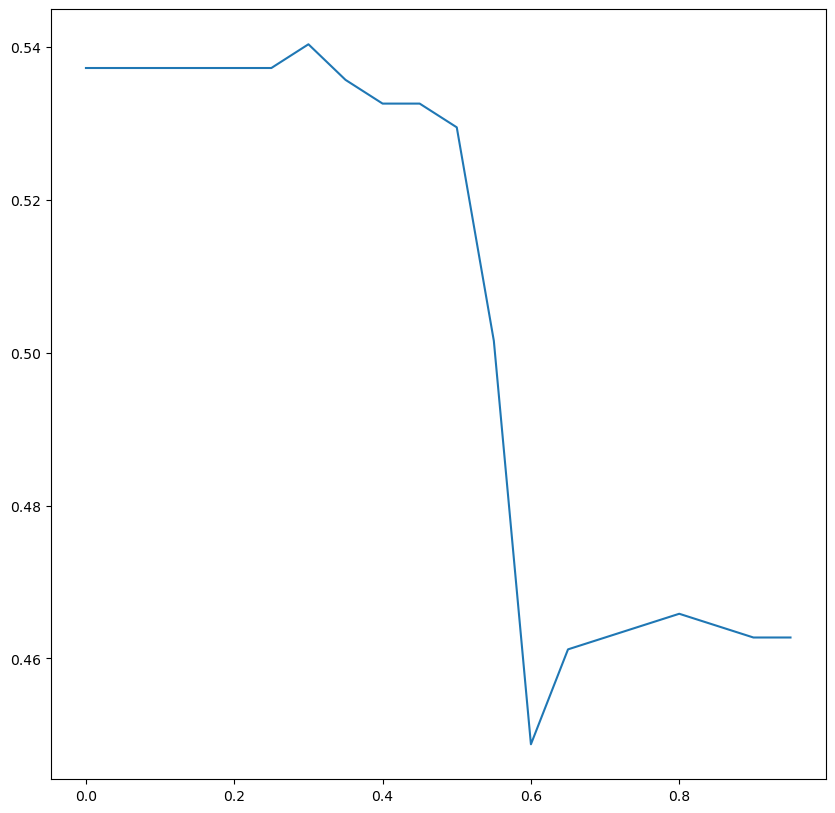

In [38]:
plt.figure(figsize=(10, 10), facecolor='w')
plt.plot(table.index, table.Accuracy)
#plt.plot(table.index, table.Precision)
#plt.plot(table.index, table.Recall)
#plt.plot(table.index, table.F1)

# 모델 (2) - Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=111, min_samples_split=300, max_depth=4)

#dt_clf.fit(X_train_scaled_pca, y_train)
dt_clf.fit(X_train_scaled, y_train)

#y_preds = dt_clf.predict(X_test_scaled_pca)
y_preds = dt_clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_preds)

acc

0.5248447204968945

In [20]:
np.arange(100, 1050, 50)

array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000])

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : list(np.arange(1, 1200, 50)),
    'min_samples_leaf' : list(np.arange(1, 1200, 50)),
    'max_leaf_nodes' : list(np.arange(1, 6, 1))
}

dt_clf = DecisionTreeClassifier(random_state=111)

grid_dt = GridSearchCV(dt_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1, refit=True, n_jobs=-1)

grid_dt.fit(X_train_scaled, y_train)

scores_dtc = pd.DataFrame(grid_dt.cv_results_)

Fitting 3 folds for each of 14400 candidates, totalling 43200 fits
CPU times: user 3.3 ms, sys: 211 µs, total: 3.51 ms
Wall time: 3.52 ms


In [34]:
scores_dtc.iloc[:, 6:].head()

param_min_samples_leaf param_min_samples_split  \
0                      1                       1   
1                      1                      51   
2                      1                     101   
3                      1                     151   
4                      1                     201   

                                              params  split0_test_score  \
0  {'max_depth': 1, 'max_leaf_nodes': 1, 'min_sam...                NaN   
1  {'max_depth': 1, 'max_leaf_nodes': 1, 'min_sam...                NaN   
2  {'max_depth': 1, 'max_leaf_nodes': 1, 'min_sam...                NaN   
3  {'max_depth': 1, 'max_leaf_nodes': 1, 'min_sam...                NaN   
4  {'max_depth': 1, 'max_leaf_nodes': 1, 'min_sam...                NaN   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2                NaN                NaN              NaN             NaN   
3                NaN                NaN              NaN             NaN   
4                NaN                NaN              NaN             NaN   

   rank_test_score  
0            14400  
1            11278  
2            11306  
3            11302  
4            11301

In [35]:
grid_dt.best_params_, grid_dt.best_score_

({'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_leaf': 851,
  'min_samples_split': 51},
 0.5407407407407407)

In [36]:
dt_update = grid_dt.best_estimator_
y_pred_dtc = dt_update.predict(X_test_scaled)
accuracy_score(y_test, y_pred_dtc)

0.5279503105590062

위 결과를 decision_tree로

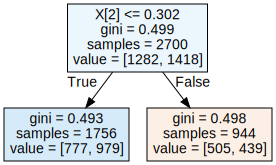

In [37]:
from sklearn.tree import export_graphviz

#dt_update.fit(X_train_scaled, y_train)

export_graphviz(dt_update, out_file="tree.dot", impurity=True, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)